In [7]:
import os, sys
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

In [9]:
DATA_PATH = '/Users/holger/Desktop/master_thesis/data/arodz12/'
UNIPROT_ID = 'P61626'
DF_STRUCMAP = pd.read_excel(DATA_PATH + 'arodz12_protherm_singlemut_directonly.xls')
PDBS = DF_STRUCMAP['ProTherm PDB B']
PDBS = PDBS[0:251].unique()
PDBS

array(['1gb5', '1gb6', '1gb7', '1gb8', '1gb9', '1gbo', '1gbw', '1gbx',
       '1gby', '1gbz', '1gfh', '1gfj', '1gfk', '1gfr', '1gft', '1gfu',
       '1gfv', '1inu', '1lhh', '1lhi', '1lhj', '1lhk', '1lhl', '1oub',
       '1ouc', '1oud', '1oue', '1ouh', '1oui', '1ouj', '1wqm', '1wqn',
       '1wqo', '1wqp', '1wqq', '1wqr', '1yam', '1yan', '1yao', '1yap',
       '1yaq', '2hea', '2heb', '2hec', '2hed', '2hee', '2hef'],
      dtype=object)

In [10]:
def download_pdb(pdbcode, datadir, downloadurl="https://files.rcsb.org/download/"):
    """
    Downloads a PDB file from the Internet and saves it in a data directory.
    :param pdbcode: The standard PDB ID e.g. '3ICB' or '3icb'
    :param datadir: The directory where the downloaded file will be saved
    :param downloadurl: The base PDB download URL, cf.
        `https://www.rcsb.org/pages/download/http#structures` for details
    :return: the full path to the downloaded PDB file or None if something went wrong
    """
    pdbfn = pdbcode + ".pdb"
    url = downloadurl + pdbfn
    outfnm = os.path.join(datadir, pdbfn)
    try:
        urllib.request.urlretrieve(url, outfnm)
        return outfnm
    except Exception as err:
        print(str(err), file=sys.stderr)
        return None


In [11]:
# Downlaod structures
for i in range(len(PDBS)):
    download_pdb(PDBS[i], DATA_PATH + 'pdbs_P6162/')

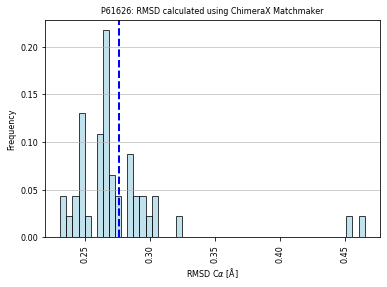

In [4]:
rmsd_list = [0.30329013881423583, 0.29554360576108896, 0.2940841614468546, 0.26735801918884783, 0.2865021325593939, 0.270132471590633, 0.28796661195781525, 0.2839451059997581, 0.2898325342646128, 0.45475308935797043, 0.2774801000627266, 0.29760791325975067, 0.26353265596293957, 0.24683746256830724, 0.4655212475674121, 0.3216581108651091, 0.27189975220106055, 0.2653093150662584, 0.2845604071413339, 0.245152775496432, 0.23084782410304355, 0.2649613191652941, 0.2715989057527498, 0.2643146168287701, 0.262621710229107, 0.2610488435424217, 0.26467725647783563, 0.2649231204328135, 0.2623326313099566, 0.282817495114213, 0.2426875564290143, 0.2523199502340575, 0.2663647992362645, 0.23827070541274512, 0.24584265535789404, 0.24515278994007664, 0.26344188392824724, 0.26485336480791044, 0.2431120704739366, 0.2642888534835462, 0.24937009606097027, 0.2774249025226909, 0.3014449050012343, 0.23082506353879606, 0.2649080995870902, 0.24806152191171407]
output_variance_np = np.asarray(rmsd_list)
# Create histogram of means
hist,bin_edges = np.histogram(rmsd_list)
weights = np.ones_like(rmsd_list) / len(rmsd_list)
n, bins, patches = plt.hist(rmsd_list, 50, weights = weights, facecolor='lightblue', edgecolor='k', alpha=0.75)
plt.grid(axis='y', alpha=0.75)
plt.xlabel(r'RMSD C$\alpha$ [Å]',fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.xticks(fontsize=8,rotation='vertical')
plt.yticks(fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.title('P61626: RMSD calculated using ChimeraX Matchmaker',fontsize=8)
plt.axvline(np.mean(rmsd_list), color='b', linestyle='dashed', linewidth=2)
plt.savefig('/Users/holger/Desktop/master_thesis/data/arodz12/figs/rmsd_dis_61626.png', dpi=1200, bbox_inches = 'tight')

In [6]:
# Missing rmsd for one structure